### Objective

#### The Credit Score Classification project aimed to develop a robust and accurate system for classifying credit scores. 

#### Credit score classification plays a vital role in assessing an individual's creditworthiness and determining their eligibility for loans, credit cards, and other financial services. It is a crucial component of risk assessment for financial institutions, helping them make informed decisions while minimizing the risk of defaults.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### Load dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Dataset dimensions

In [3]:
print('Train data: ',train.shape)
print('Test data: ',test.shape)

Train data:  (100000, 28)
Test data:  (50000, 27)


#### Preview of data

In [4]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


#### Dataset info

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

#### Dataset type

In [6]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

#### Observations

1. Datatype of certain features are not correct
2. We have certain missing values in data
3. The unwanted characters in the column value of certain columns  like SSN, Customer ID etc. needs to be fixed
4. Values in certain column are not correct, like the number of bank accounts has maximum value of 1798 which is not possible,i.e,there is inconsistency in data 

#### Dropping unnecessary columns

In [7]:
train.drop(columns=['ID', 'Name', 'SSN','Type_of_Loan'], inplace=True)

#### Removing 'CUS_' from Customer_ID and converting hexadecimel to integer

In [8]:
train['Customer_ID'] = train.Customer_ID.apply(lambda x: int(x[4:], 16)) 

#### Replacing unwanted characters or symbols

In [9]:
train = train.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(' and', '').replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

#### Converting datatype of variables

In [10]:
to_int = ['Age','Num_of_Loan']
to_float = ['Annual_Income','Changed_Credit_Limit','Num_of_Delayed_Payment','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
to_object = ['Customer_ID']

for var in to_int:
    train[var] = train[var].astype(int)        
    
for var in to_float:
    train[var] = train[var].astype(float)

for var in to_object:
    train[var] = train[var].astype(object)

In [16]:
train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


### Descriptive Analysis

#### Unique values under columns

In [11]:
train.describe(exclude=np.number).T

,count,unique,top,freq
Customer_ID,100000,12500,3392,8
Month,100000,8,January,12500
Occupation,92938,15,Lawyer,6575
Credit_Mix,79805,3,Standard,36479
Credit_History_Age,90970,404,15 Years and 11 Months,446
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,92400,6,Low_spent_Small_value_payments,25513
Credit_Score,100000,3,Standard,53174


#### Change month and years to months 

In [113]:
def no_of_months(x):
    if pd.notnull(x) and isinstance(x, str):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
        months = (num1*12) + num1
        return round(months, 2)  
    else:
        return x

train['Credit_History_Age'] = train['Credit_History_Age'].apply(lambda x: no_of_months(x)).astype(float)

In [114]:
train['Credit_History_Age']

0        286.0
1          NaN
2        286.0
3        286.0
4        286.0
         ...  
99995    403.0
99996    403.0
99997    403.0
99998    403.0
99999    403.0
Name: Credit_History_Age, Length: 100000, dtype: float64

#### Feature classification

In [115]:
discrete = train.select_dtypes(include='int').columns
continuous = train.select_dtypes(include='float').columns
categorical = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']

In [116]:
discrete

Index(['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date'],
      dtype='object')

In [117]:
continuous

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

### Handling missing values

#### Checking unique values

In [118]:
for var in categorical:
    print("Column :",var)
    print(train[var].value_counts(dropna=False))
    print("No of null: ",train[var].isnull().sum())
    print("______________________________")

Column : Occupation
NaN              7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64
No of null:  7062
______________________________
Column : Credit_Mix
Standard    36479
Good        24337
NaN         20195
Bad         18989
Name: Credit_Mix, dtype: int64
No of null:  20195
______________________________
Column : Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64
No of null:  0
______________________________
Column : Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value

#### Defining function to fill mode

In [119]:
def fill_mode(df, groupby, column, inplace=True):
     
    if inplace:
        mode_by_group = train.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        df[column]=mode_by_group
        
    else:
        return mode_by_group

#### Replacing NM (Not Mentioned) with NaN

In [120]:
train['Payment_of_Min_Amount'] = train['Payment_of_Min_Amount'].replace('NM', np.nan)

#### Replacing NaN values with mode

In [121]:
for var in categorical:
    if var != 'Credit_Score':
        fill_mode(train, 'Customer_ID', var)

In [122]:
for var in categorical:
    print(var, train[var].isnull().sum())

Occupation 0
Credit_Mix 0
Payment_of_Min_Amount 0
Payment_Behaviour 0
Credit_Score 0


#### Defining function to assign NaN to wrong values 

In [123]:
def fill_min_max(df, groupby, column, inplace=True):
    df_new = df[df[column].notna()].groupby(groupby)[column].apply(list)
    x, y = df_new.apply(lambda x: stats.mode(x)).apply([min, max])
    min_, max_ = x[0][0], y[0][0]

    col = df[column].apply(lambda x: np.NaN if ((x<min_)|(x>max_)) else x)

In [124]:
for var in discrete:
    fill_min_max(train,'Customer_ID',var)
    fill_mode(train,'Customer_ID',var)

#### Defining function to fill median

In [125]:
def fill_median(df, groupby, column, inplace=True):
    if inplace:
        median_by_group = df.groupby(groupby)[column].transform(lambda x: x.median() if not x.empty else np.NaN)
        df[column] = median_by_group
    else:
        return median_by_group

In [126]:
for var in continuous:
    fill_min_max(train,'Customer_ID',var)
    fill_median(train,'Customer_ID',var)

In [127]:
train.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [128]:
train.to_excel('preprocessed.xlsx')

In [129]:
train = pd.read_excel('preprocessed.xlsx')

In [68]:
categorical

['Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

### Exploratory Data Analysis

#### Categorical variables

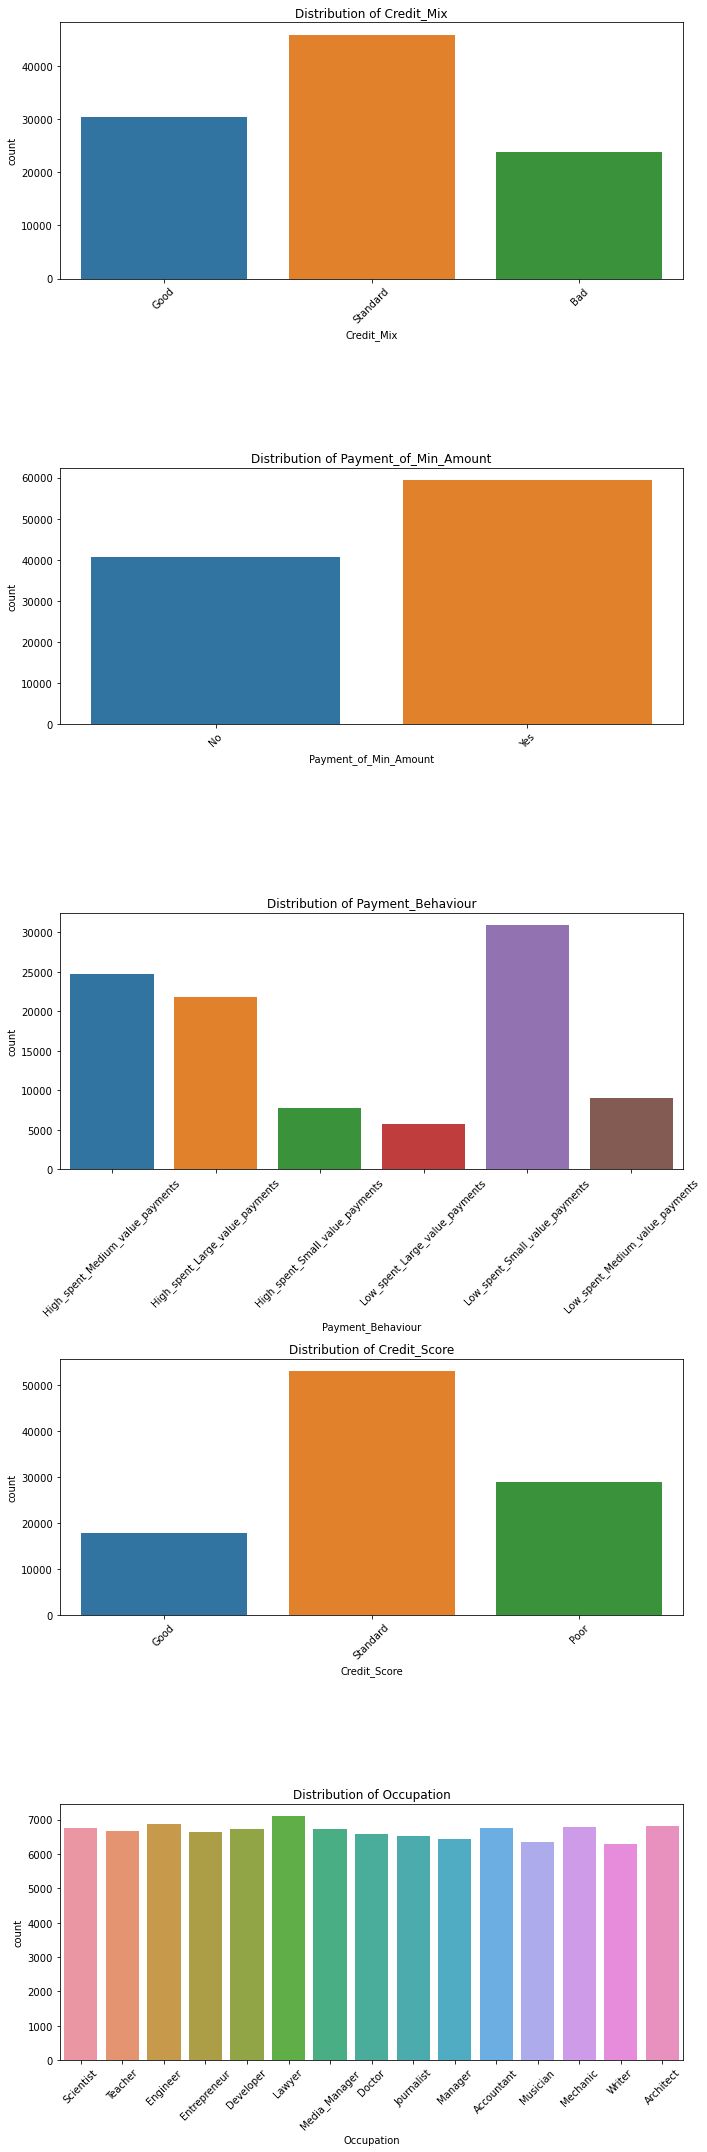

In [88]:
fig, axes = plt.subplots(5,1, figsize=(10,30))
axes = axes.flatten()

for i, column in enumerate(categorical):
    sns.countplot(x=column, data=train, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

#### Discrete variables

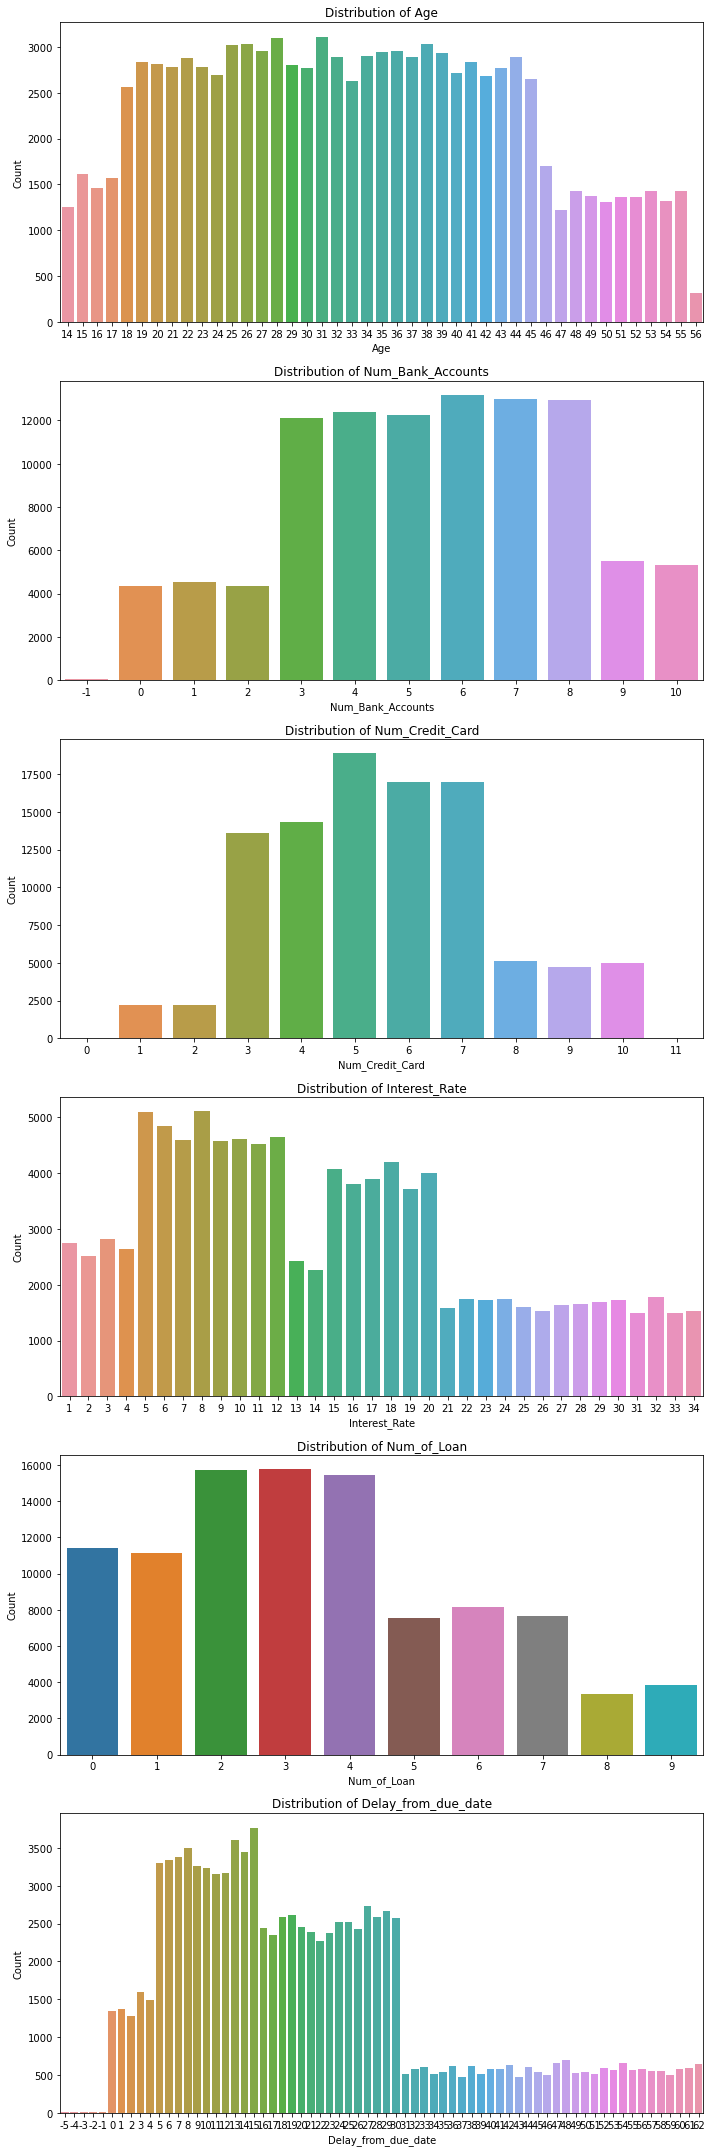

In [95]:
fig,axes=plt.subplots(6,1,figsize=(10,30))
axes=axes.flatten()

for i,feature in enumerate(discrete):
    value_counts = train[feature].value_counts().reset_index()
    sns.barplot(x='index',y=feature,data=value_counts,ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Distribution of {feature}")
    
fig.tight_layout()
plt.show()

#### Continuous variables

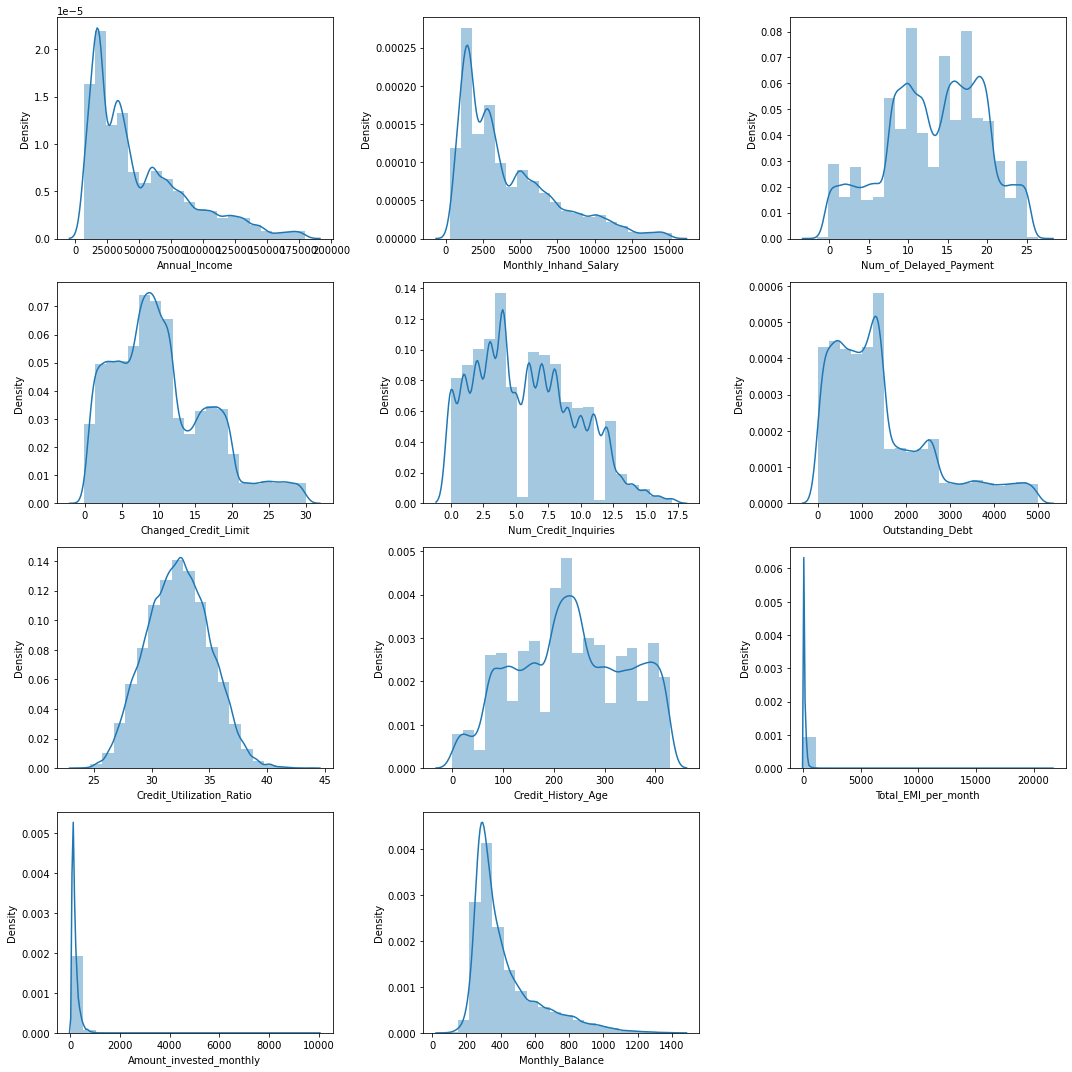

In [130]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(continuous):
    sns.distplot(train[feature], ax=axes[i], bins=20)
    axes[i].set_xlabel(feature)

if len(continuous) < 12:
    for j in range(len(continuous), 12):
        fig.delaxes(axes[j])
        
fig.tight_layout()
plt.show()

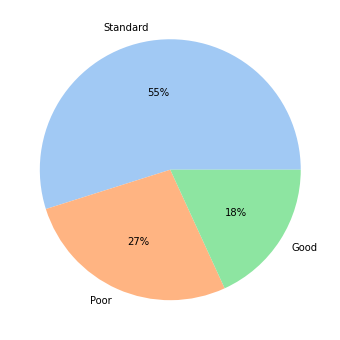

In [137]:
colors = sns.color_palette('pastel')[0:3]

plt.figure(figsize=(6, 6)) 
plt.pie(train['Credit_Score'].value_counts(),labels=train['Credit_Score'].value_counts().index,autopct='%.0f%%',colors=colors)
plt.show()

#### Observations

1. There is not much difference in counts of various occupations
2. Distribution of credit utilization ratio is approximately normal and maximum of the continuous features have skewed distribution

### Outlier Handling

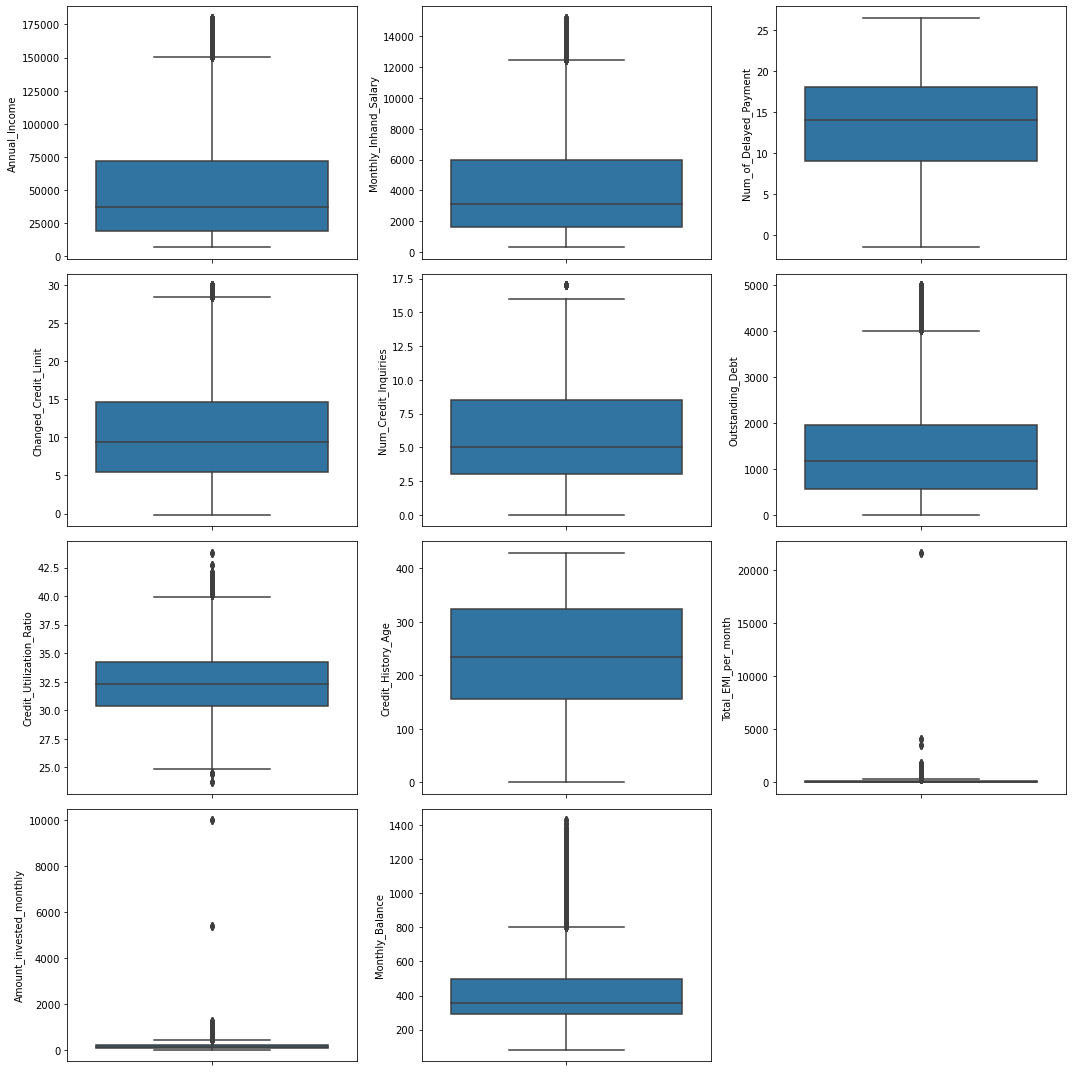

In [131]:
plt.figure(figsize=(15, 15))

for i, feature in enumerate(continuous):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data = train, y=feature)
    
plt.tight_layout()
plt.show()

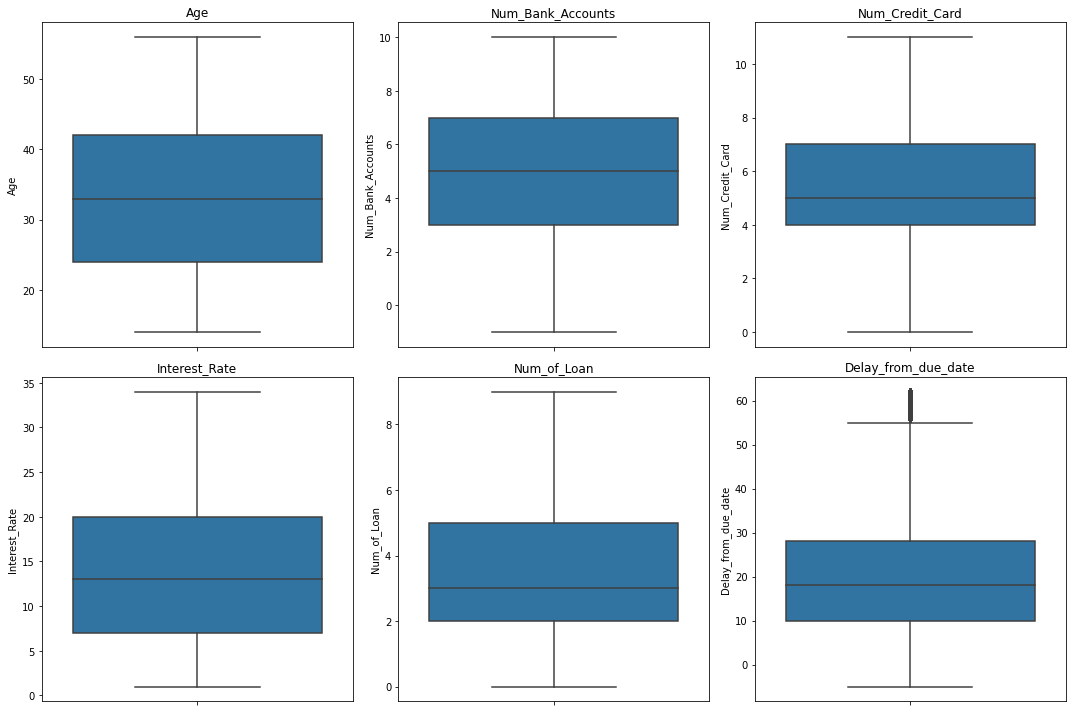

In [132]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(discrete):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data = train, y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

#### Observations

1. Among discrete features ,only delay from due date has certain outliers
2. Among continuous features , there are several features which contain outliers and among them total emi per month and amount invested monthly has a bit different plot so we treat these two differently and the rest we deal using inter quartile method

In [96]:
variables = ['Annual_Income','Monthly_Inhand_Salary','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Monthly_Balance','Delay_from_due_date']
    
for var in variables:
    IQR = train[var].quantile(0.75) - train[var].quantile(0.25)
    lower_bridge = train[var].quantile(0.25) - (IQR * 1.5)
    upper_bridge = train[var].quantile(0.75) + (IQR * 1.5)

    train = train[(train[var] >= lower_bridge) & (train[var] <= upper_bridge)]

In [97]:
variables = ['Total_EMI_per_month','Amount_invested_monthly']

for var in variables:
    pct_5 = np.percentile(train[var], 5)
    pct_95 = np.percentile(train[var], 95)
    train[var] = np.where(train[var]> pct_95, pct_95,np.where(train[var] < pct_5, pct_5, train[var]))

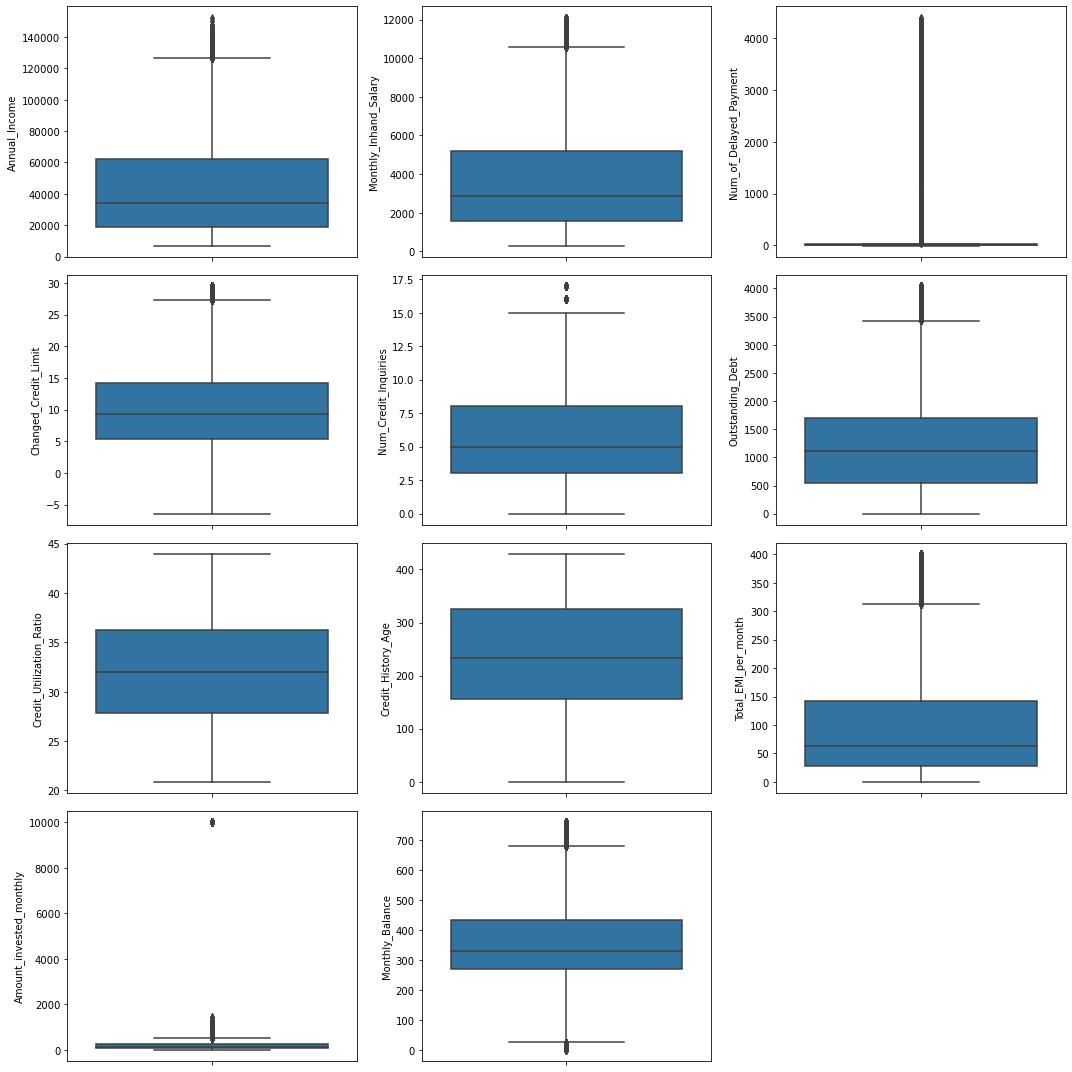

In [98]:
plt.figure(figsize=(15, 15))

for i, feature in enumerate(continuous):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data = train, y=feature)
    
plt.tight_layout()
plt.show()

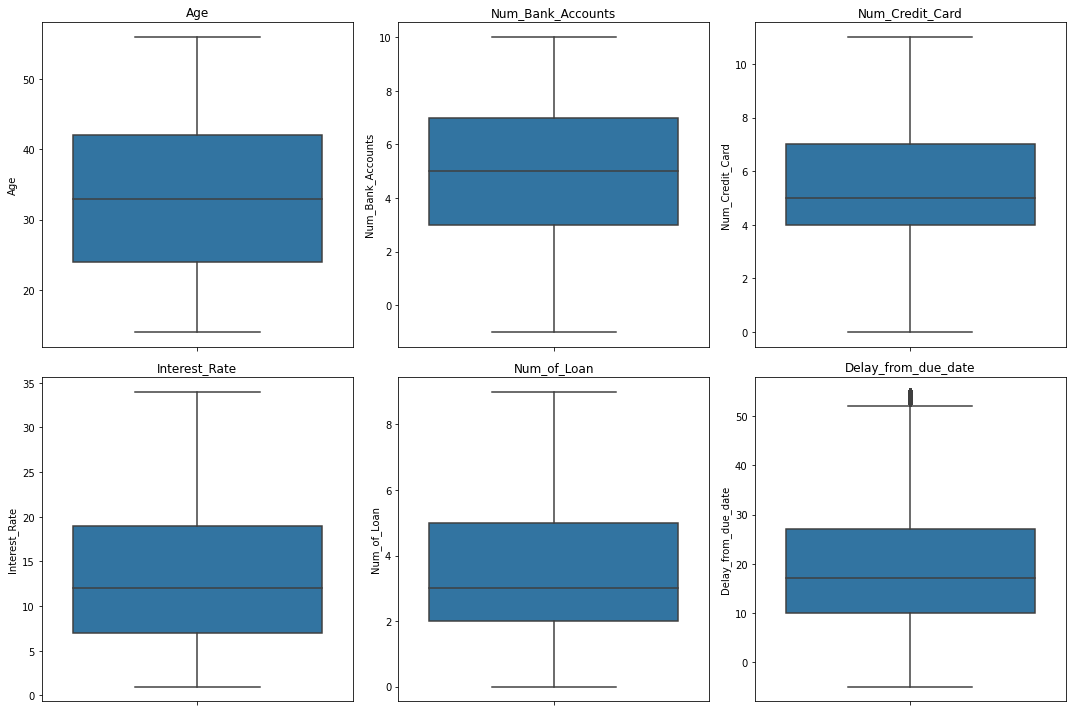

In [99]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(discrete):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data = train, y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

From the plot we can see that we have removed the outliers to a great extent

In [100]:
train.drop('Customer_ID',axis=1,inplace=True)

### Multivariate Analysis

<AxesSubplot:>

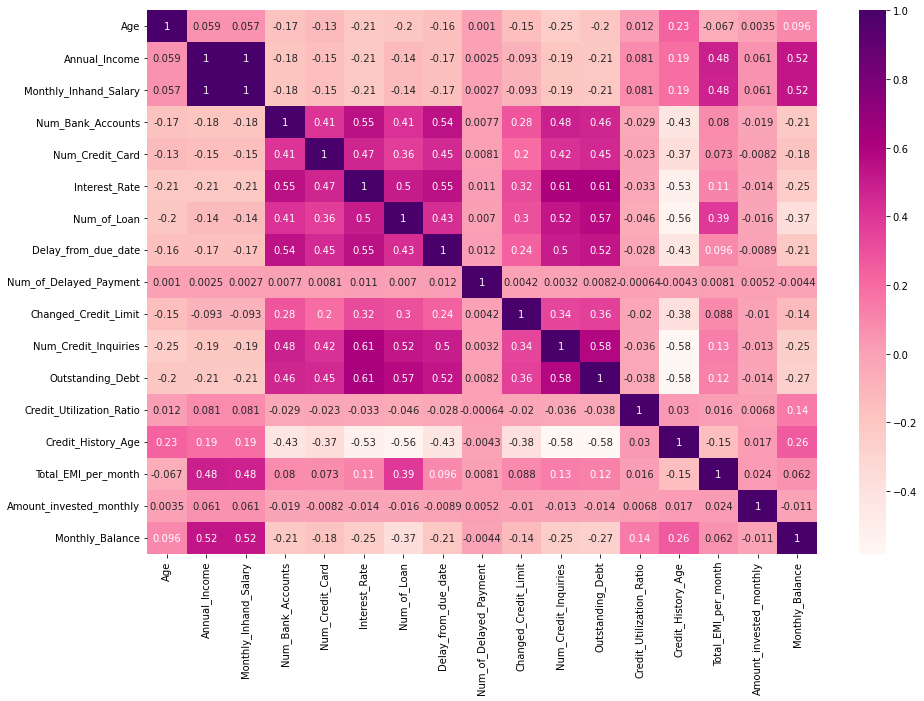

In [101]:
cor = train.corr()
cmap = "RdPu"

plt.figure(figsize=(15, 10))
sns.heatmap(cor, annot=True, cmap=cmap)

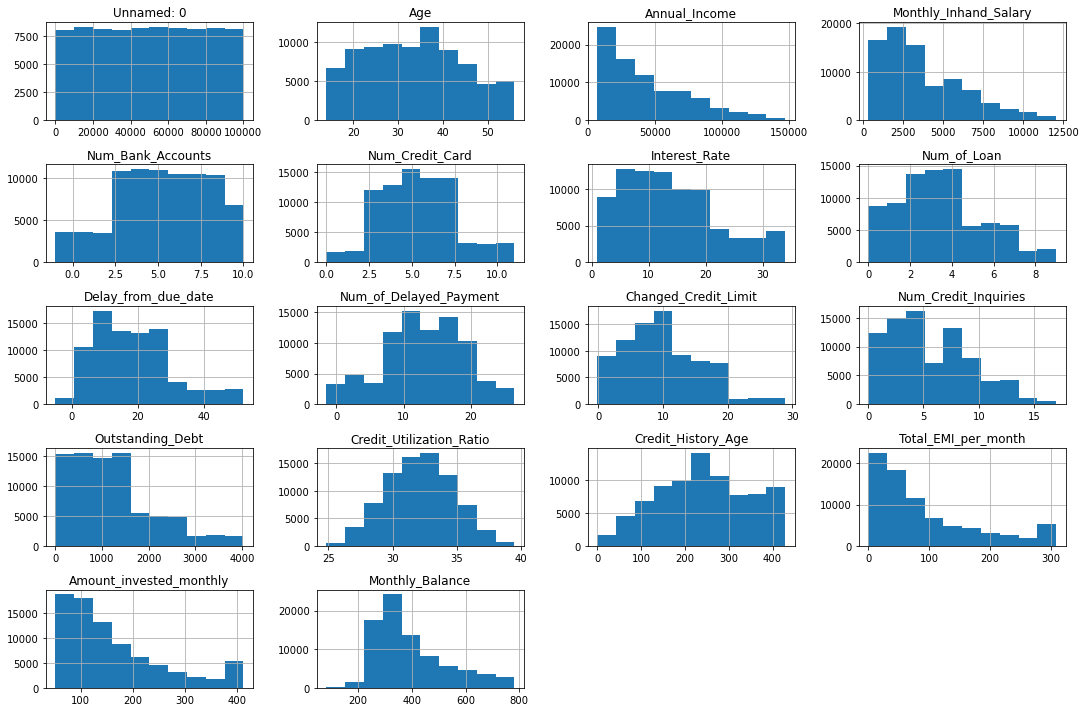

In [140]:
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

1. Amount invested monthly is highly correlated with monthly in hand salary and annual income
2. Monthly balance is also highly correlated with monthly in hand salary and annual income 

In [141]:
train.to_excel('preprocessed2.xlsx')

In [142]:
train = pd.read_excel('preprocessed2.xlsx')

### Feature Engineering

In [143]:
categorical

['Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

#### Feature Encoding

In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

variables = ['Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score','Month']

for var in variables:
    train[var]=le.fit_transform(train[var])

In [149]:
train = pd.get_dummies(train,prefix='Occupation',prefix_sep='-',columns=['Occupation'])

In [159]:
train = train.drop(['Unnamed: 0','Unnamed: 0.1'], axis =1)

In [160]:
train.columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation-Accountant', 'Occupation-Architect',
       'Occupation-Developer', 'Occupation-Doctor', 'Occupation-Engineer',
       'Occupation-Entrepreneur', 'Occupation-Journalist', 'Occupation-Lawyer',
       'Occupation-Manager', 'Occupation-Mechanic', 'Occupation-Media_Manager',
       'Occupation-Musician', 'Occupation-Scientist', 'Occupation-Teacher',
       'Occupation-Writer'],
      dtype='object')

#### Feature scaling

In [152]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',]

for i in columns_to_scale:
    train[i]=scaler.fit_transform(train[[i]])

In [161]:
train.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation-Entrepreneur,Occupation-Journalist,Occupation-Lawyer,Occupation-Manager,Occupation-Mechanic,Occupation-Media_Manager,Occupation-Musician,Occupation-Scientist,Occupation-Teacher,Occupation-Writer
0,3,-0.96731,-0.834019,-0.741122,-0.884378,-0.693197,-1.299103,0.279764,-1.339076,-1.091381,...,0,0,0,0,0,0,0,1,0,0
1,2,-0.96731,-0.834019,-0.741122,-0.884378,-0.693197,-1.299103,0.279764,-1.339076,-1.091381,...,0,0,0,0,0,0,0,1,0,0
2,6,-0.96731,-0.834019,-0.741122,-0.884378,-0.693197,-1.299103,0.279764,-1.339076,-1.091381,...,0,0,0,0,0,0,0,1,0,0
3,0,-0.96731,-0.834019,-0.741122,-0.884378,-0.693197,-1.299103,0.279764,-1.339076,-1.091381,...,0,0,0,0,0,0,0,1,0,0
4,7,-0.96731,-0.834019,-0.741122,-0.884378,-0.693197,-1.299103,0.279764,-1.339076,-1.091381,...,0,0,0,0,0,0,0,1,0,0


### Feature Selection

In [162]:
X = train.drop('Credit_Score',axis=1)
Y = train['Credit_Score']

In [164]:
from sklearn.ensemble import ExtraTreesClassifier

selector = ExtraTreesClassifier()
selector.fit(X,Y)

ExtraTreesClassifier()

In [183]:
feature_imp = pd.Series(selector.feature_importances_, X.columns).sort_values(ascending=False)
feature_imp.plot(kind='bar', title='Feature Importance')

ValueError: All arrays must be of the same length

<Figure size 720x720 with 0 Axes>

In [166]:
X = X.drop(['Occupation-Accountant', 'Occupation-Architect', 'Occupation-Developer',
       'Occupation-Doctor', 'Occupation-Engineer', 'Occupation-Entrepreneur',
       'Occupation-Journalist', 'Occupation-Lawyer', 'Occupation-Manager',
       'Occupation-Mechanic', 'Occupation-Media_Manager',
       'Occupation-Musician', 'Occupation-Scientist', 'Occupation-Teacher',
       'Occupation-Writer'],axis=1)

### Model Building

#### Multinomial Logistic Regression

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 0)

In [172]:
from sklearn.linear_model import LogisticRegression

class_weights = {0: 4.0, 1: 2.0, 2: 1.0}
lr = LogisticRegression(multi_class='multinomial',class_weight=class_weights)
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

In [173]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(confusion_matrix(Y_test,Y_pred_lr))
print(accuracy_score(Y_test,Y_pred_lr))
print(classification_report(Y_test,Y_pred_lr))

[[2516   50  404]
 [ 804 2865  744]
 [2124 1474 5379]]
0.6577017114914425
              precision    recall  f1-score   support

           0       0.46      0.85      0.60      2970
           1       0.65      0.65      0.65      4413
           2       0.82      0.60      0.69      8977

    accuracy                           0.66     16360
   macro avg       0.65      0.70      0.65     16360
weighted avg       0.71      0.66      0.66     16360



#### Random Forest Classifier

In [175]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight=class_weights, random_state=0)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [176]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(confusion_matrix(Y_test,Y_pred_rf))
print(accuracy_score(Y_test,Y_pred_rf))
print(classification_report(Y_test,Y_pred_rf))

[[2090    2  878]
 [   3 3336 1074]
 [ 777 1080 7120]]
0.7668704156479218
              precision    recall  f1-score   support

           0       0.73      0.70      0.72      2970
           1       0.76      0.76      0.76      4413
           2       0.78      0.79      0.79      8977

    accuracy                           0.77     16360
   macro avg       0.76      0.75      0.75     16360
weighted avg       0.77      0.77      0.77     16360



#### XGBoost 

In [177]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)

In [179]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(confusion_matrix(Y_test,Y_pred_xgb))
print(accuracy_score(Y_test,Y_pred_xgb))
print(classification_report(Y_test,Y_pred_xgb))

[[2347    5  618]
 [  72 3560  781]
 [ 681  969 7327]]
0.8089242053789731
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2970
           1       0.79      0.81      0.80      4413
           2       0.84      0.82      0.83      8977

    accuracy                           0.81     16360
   macro avg       0.79      0.80      0.80     16360
weighted avg       0.81      0.81      0.81     16360



Among all the models xgboost is giving us the best results so we try hyperparameter on it to see if we can further improve the model

#### Hyperparameter Tuning

In [184]:
from sklearn.model_selection import RandomizedSearchCV

In [186]:
params = {
    "learning_rate":[0.01,0.05,0.1,0.2,0.5,1.0],
    "max_depth":[5,8,10,11,15],
    "min_child_weight":[45,50,55,60,65,70],
    "gamma":[0.0, 0.1, 0.2 , 0.3, 0.4],
    "colsample_bytree":[0.3, 0.4, 0.5 , 0.7]
    }

In [187]:
xgb_cv = RandomizedSearchCV(xgb, param_distributions = params, cv = 5, random_state = 0)

In [188]:
xgb_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           objective='multi:softprob',
                                           predictor=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': ['0.01', '0.05', '0.1',
                                                          '0.25', '0.5', '0.75',
                                                          '1.0'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      20],
                                        'min_child_weight': [45, 46, 48, 50, 52,
                                                             53, 55, 57, 59, 61,
                                                             62, 64, 66, 68,
                                                             70]},
                   random_state=0)

In [189]:
xgb_cv.best_score_

0.8204767726161369

In [190]:
xgb_cv.best_params_

{'min_child_weight': 70,
 'max_depth': 20,
 'learning_rate': '0.75',
 'gamma': 0.1,
 'colsample_bytree': 0.4}

### Rebuilding model

In [199]:
xgb_best = XGBClassifier(colsample_bytree = 0.4, 
                        gamma = 0.1, 
                        learning_rate = 0.75, 
                        max_depth = 20, 
                        min_child_weight = 70, verbosity = 0,random_state=0)

In [200]:
xgb_best.fit(X_train, Y_train)
Y_pred_xgb_best = xgb_best.predict(X_test)

In [201]:
print(confusion_matrix(Y_test,Y_pred_xgb_best))
print(accuracy_score(Y_test,Y_pred_xgb_best))
print(classification_report(Y_test,Y_pred_xgb_best))

[[2383    1  586]
 [   1 3672  740]
 [ 646  949 7382]]
0.8213325183374083
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2970
           1       0.79      0.83      0.81      4413
           2       0.85      0.82      0.83      8977

    accuracy                           0.82     16360
   macro avg       0.81      0.82      0.81     16360
weighted avg       0.82      0.82      0.82     16360



#### This model promises to enhance credit assessment accuracy, potentially reducing financial risks and optimizing lending decisions.

### 1.Credit Score Prediction: 
#### The machine learning model can accurately predict credit scores based on historical financial data. This can help lenders assess an individual's creditworthiness more objectively.

### 2. Feature Importance: 
#### Identify the most significant factors contributing to credit scores. This information can guide borrowers in improving their creditworthiness and lenders in refining their lending criteria.